In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


__Start with completed trips from Sourish's repo__

In [7]:
complete_trips = pd.read_csv('../Data/data_complete_trips.csv')

_Create a unique trip identifier_

In [10]:
complete_trips['trip_date'] = complete_trips['TRIP_ID'].astype('str') + complete_trips['CALENDAR_ID'].astype('str')

_next few lines_
- groupby operators and sortby count of trips
- select operators with no. of trips > threshold
- create a subset of the complete trips with operators selected

In [11]:
grouped_by_operator = complete_trips.groupby(
    'OPERATOR')['trip_date'].nunique().reset_index()

In [12]:
result = grouped_by_operator[grouped_by_operator['trip_date']>500]

In [13]:
operators_of_interest = result['OPERATOR'].tolist()

In [28]:
operators_of_interest

[379, 1040, 1147, 1170, 1617, 1761, 1762, 1823, 2164, 2352]

In [14]:
bus_subset_complete_trips = complete_trips[complete_trips['OPERATOR'].isin (operators_of_interest)]

In [15]:
bus_subset_complete_trips.shape

(22499, 32)

In [44]:
bus_subset_complete_trips['HDWY_DEV_PERC']= 100*bus_subset_complete_trips['HDWY_DEV']/bus_subset_complete_trips['SCHEDULED_HDWY']

/tmp/ipykernel_255244/3958866863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_subset_complete_trips['HDWY_DEV_PERC']= 100*bus_subset_complete_trips['HDWY_DEV']/bus_subset_complete_trips['SCHEDULED_HDWY']


In [45]:
bus_subset_complete_trips.head()

,Unnamed: 0,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,trip_date,HDWY_DEV_PERC
0,0,120230801,1,99457890,8/1/23,22,2200,1040,345104,0,...,0,0,1,0,0.0,0,2,6.500000,345104120230801,NaN
1,1,120230801,1,99457891,8/1/23,22,2200,1040,345104,0,...,0,0,1,0,0.0,0,9,0.000000,345104120230801,NaN
2,2,120230801,1,99457892,8/1/23,22,2200,1040,345104,0,...,0,0,1,0,0.0,0,19,0.000000,345104120230801,NaN
3,3,120230801,1,99457893,8/1/23,22,2200,1040,345104,0,...,0,0,1,0,NaN,0,35,0.000000,345104120230801,NaN
4,4,120230801,1,99457894,8/1/23,22,2200,1040,345105,0,...,0,0,1,0,0.0,0,36,12.866666,345105120230801,NaN


subset of the completet trips by most frequent operators with headway deviation percentage > 50%

In [46]:
bus_subset = bus_subset_complete_trips[abs(bus_subset_complete_trips['HDWY_DEV_PERC'])>50]

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

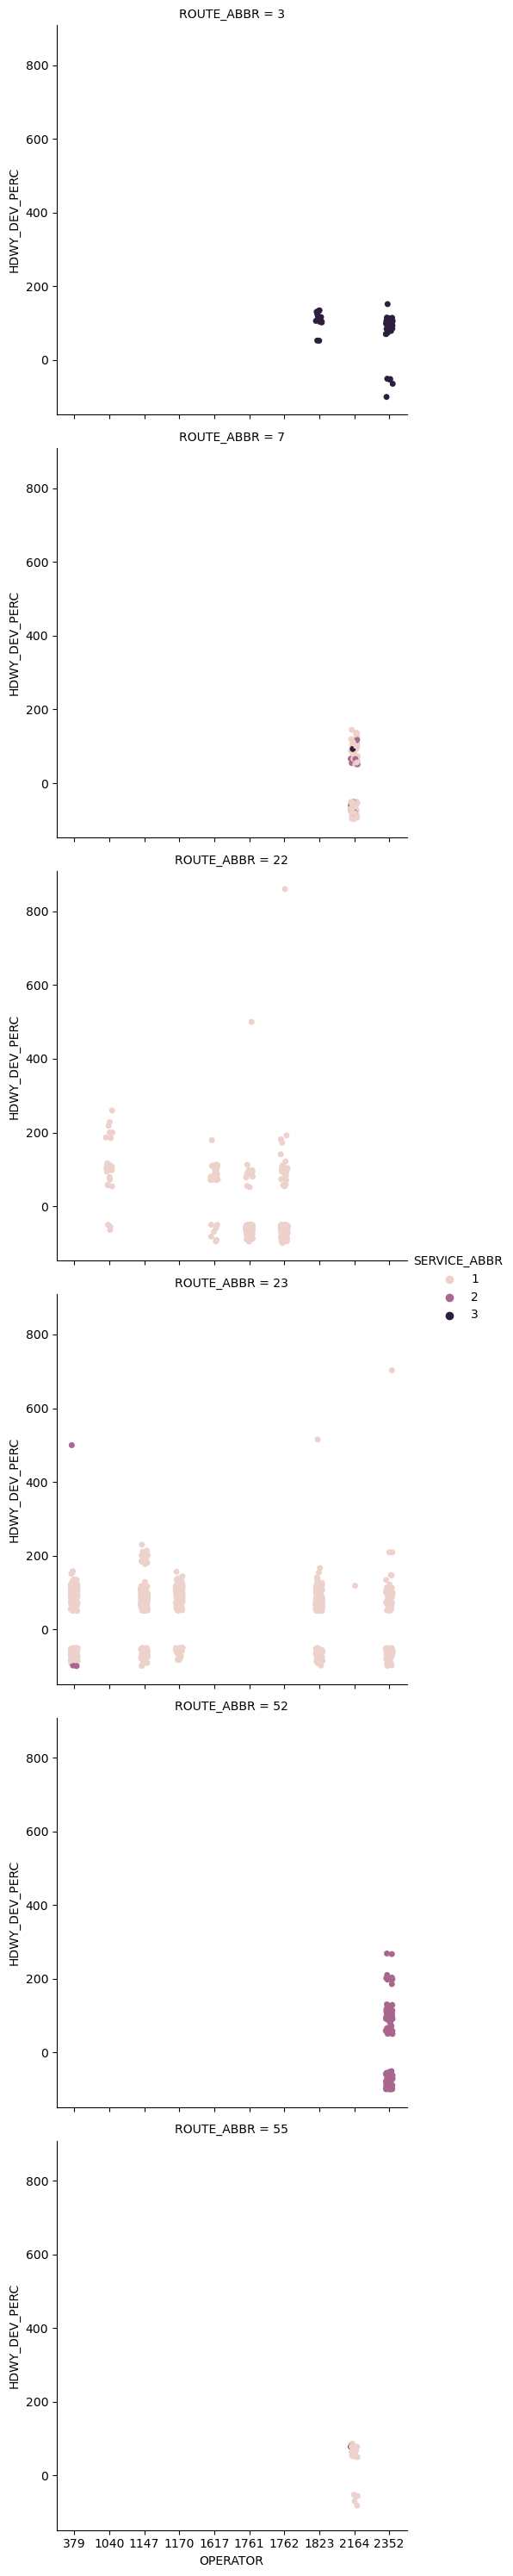

In [49]:
g = sns.catplot(data = bus_subset, x = 'OPERATOR', y = 'HDWY_DEV_PERC', hue = 'SERVICE_ABBR', row = 'ROUTE_ABBR')
# g.set(ylim=(-50, 50))

- Route 3 : Significant Sunday Headway deviation
  - More gapping than bunching
  - Operator 1823 and 2352
- Route 7 : Single Operator 2164
  - Mixed for weekend and weekdays
  - Gapping and Bunching similar
- Route 22 and 23:
  - Mostly weekdays:
  - More gapping than bunching
  - Multiple operators
- Route 52:
  - Saturday deviation
  - Single operator : 2352
- Route 55:
  - Single operator: 2164
  - Weekday